In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.preprocessing import LabelEncoder
import random
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.metrics import mean_squared_error
import datetime
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# import statsmodels.formula.api as sm
# from sklearn.model_selection import KFold
# from sklearn.cross_validation import cross_val_score, cross_val_predict
# from sklearn import metrics
import glob

In [2]:
rbStatsFiles = [filename for filename in glob.glob("C:/Users/Michael/Desktop/DFS Stuff/DFS_Data/RB/stats/*.csv")]

In [3]:
rbStatsFiles

[]

In [4]:
dfs = []

for i in range(len(rbStatsFiles)):
    df = pd.read_csv(rbStatsFiles[i])
    df['season'] = rbStatsFiles[i][-8:-4]
    dfs.append(df)

dfs

[]

In [3]:
%store -r awayTable
%store -r homeTable
%store -r awayMatchup
%store -r homeMatchup

In [125]:
rb = pd.concat(dfs,axis=0)

In [126]:
rb.head()

,Rank,Name,Team,Position,Week,Opponent,RushingAttempts,RushingYards,RushingYardsPerAttempt,RushingTouchdowns,ReceivingTargets,Receptions,ReceivingYards,ReceivingTouchdowns,Fumbles,FumblesLost,FantasyPointsPerGameFanDuel,FantasyPointsFanDuel,season
0,1,Arian Foster,HOU,RB,7,TEN,25,115,4.6,2,5,5,119,1,0,0,43.9,43.9,2011
1,2,Maurice Jones-Drew,JAX,RB,14,TB,27,85,3.1,2,6,6,51,2,0,0,40.6,40.6,2011
2,3,Kevin Smith,DET,RB,11,CAR,16,140,8.8,2,4,4,61,1,0,0,40.1,40.1,2011
3,4,CJ Spiller,BUF,RB,15,MIA,12,91,7.6,1,11,9,76,1,0,0,33.2,33.2,2011
4,5,Steven Jackson,LAR,RB,8,NO,25,159,6.4,2,5,4,32,0,0,0,33.1,33.1,2011


In [127]:
# Clean up the Team column to match the team column in awayTable and homeTable
teams1 = set(rb['Team'])
teams1.remove('SF')

In [128]:
teams2 = set(awayTable['team'])
teams2.remove('San Francisco 49ers')

In [129]:
t1List = list(teams1)
t2List = list(teams2)
t1List.sort()
t2List.sort()
zipTeams = zip(t1List, t2List)
teamDict = dict(list(zipTeams))
teamDict['SF'] = 'San Francisco 49ers'
teamDict

{'ARI': 'Arizona Cardinals',
 'ATL': 'Atlanta Falcons',
 'BAL': 'Baltimore Ravens',
 'BUF': 'Buffalo Bills',
 'CAR': 'Carolina Panthers',
 'CHI': 'Chicago Bears',
 'CIN': 'Cincinnati Bengals',
 'CLE': 'Cleveland Browns',
 'DAL': 'Dallas Cowboys',
 'DEN': 'Denver Broncos',
 'DET': 'Detroit Lions',
 'GB': 'Green Bay Packers',
 'HOU': 'Houston Texans',
 'IND': 'Indianapolis Colts',
 'JAX': 'Jacksonville Jaguars',
 'KC': 'Kansas City Chiefs',
 'LAC': 'Los Angeles Chargers',
 'LAR': 'Los Angeles Rams',
 'MIA': 'Miami Dolphins',
 'MIN': 'Minnesota Vikings',
 'NE': 'New England Patriots',
 'NO': 'New Orleans Saints',
 'NYG': 'New York Giants',
 'NYJ': 'New York Jets',
 'OAK': 'Oakland Raiders',
 'PHI': 'Philadelphia Eagles',
 'PIT': 'Pittsburgh Steelers',
 'SEA': 'Seattle Seahawks',
 'SF': 'San Francisco 49ers',
 'TB': 'Tampa Bay Buccaneers',
 'TEN': 'Tennessee Titans',
 'WAS': 'Washington Redskins'}

In [130]:
rb['Team'] = rb['Team'].map(teamDict)
rb.head()

,Rank,Name,Team,Position,Week,Opponent,RushingAttempts,RushingYards,RushingYardsPerAttempt,RushingTouchdowns,ReceivingTargets,Receptions,ReceivingYards,ReceivingTouchdowns,Fumbles,FumblesLost,FantasyPointsPerGameFanDuel,FantasyPointsFanDuel,season
0,1,Arian Foster,Houston Texans,RB,7,TEN,25,115,4.6,2,5,5,119,1,0,0,43.9,43.9,2011
1,2,Maurice Jones-Drew,Jacksonville Jaguars,RB,14,TB,27,85,3.1,2,6,6,51,2,0,0,40.6,40.6,2011
2,3,Kevin Smith,Detroit Lions,RB,11,CAR,16,140,8.8,2,4,4,61,1,0,0,40.1,40.1,2011
3,4,CJ Spiller,Buffalo Bills,RB,15,MIA,12,91,7.6,1,11,9,76,1,0,0,33.2,33.2,2011
4,5,Steven Jackson,Los Angeles Rams,RB,8,NO,25,159,6.4,2,5,4,32,0,0,0,33.1,33.1,2011


In [131]:
awayMatchup

,gameId,date,season,week,team_x,homeAway,stadium,roof,surface,avgPf,...,defDvoa,ptsMatchup,offMatchup,ovrMatchup,passMatchup,pblkMatchup,runMatchup,offDvoaMatchup,totalDvoaMatchup,pf
0,201811110kan,2018-11-11,2018,10,Arizona Cardinals,away,Arrowhead Stadium,outdoors,grass,14.857143,...,0.076,37.857143,-10.285714,-13.857143,-10.600000,-16.071429,0.657143,-0.307,-0.764,14
1,201610300car,2016-10-30,2016,8,Arizona Cardinals,away,Bank of America Stadium,outdoors,grass,22.714286,...,0.031,51.285714,3.000000,4.457143,-2.228571,3.257143,-3.157143,-0.041,0.170,20
2,201612240sea,2016-12-24,2016,16,Arizona Cardinals,away,CenturyLink Field,outdoors,turf,25.857143,...,-0.128,43.857143,0.757143,-3.042857,7.171429,-14.242857,-9.314286,-0.225,-0.155,34
3,201812300sea,2018-12-30,2018,17,Arizona Cardinals,away,CenturyLink Field,outdoors,turf,13.000000,...,0.010,36.857143,-7.400000,-13.642857,-7.628571,-6.100000,-7.414286,-0.406,-0.520,24
4,201712310sea,2017-12-31,2017,17,Arizona Cardinals,away,CenturyLink Field,outdoors,turf,18.571429,...,-0.052,41.000000,-9.228571,-2.514286,-15.628571,-5.085714,-6.285714,-0.254,-0.144,26
5,201712170was,2017-12-17,2017,15,Arizona Cardinals,away,FedExField,outdoors,grass,16.000000,...,-0.031,44.142857,-2.071429,-0.171429,-6.557143,-3.028571,-1.585714,-0.193,-0.072,15
6,201709100det,2017-09-10,2017,1,Arizona Cardinals,away,Ford Field,dome,turf,30.857143,...,0.006,53.571429,5.714286,1.285714,7.328571,-9.628571,-2.157143,0.009,0.018,23
7,201611270atl,2016-11-27,2016,12,Arizona Cardinals,away,Georgia Dome,dome,turf,21.000000,...,0.086,48.428571,3.085714,-2.900000,1.257143,-4.371429,-6.971429,-0.020,-0.195,19
8,201612110mia,2016-12-11,2016,14,Arizona Cardinals,away,Hard Rock Stadium,outdoors,grass,21.571429,...,0.000,44.285714,1.685714,-0.414286,4.371429,-11.557143,-4.042857,-0.122,-0.032,23
9,201812020gnb,2018-12-02,2018,13,Arizona Cardinals,away,Lambeau Field,outdoors,grass,16.857143,...,0.016,43.142857,-5.100000,-9.085714,-4.642857,-8.500000,-2.785714,-0.380,-0.489,20


In [132]:
awayMatchup.columns

Index(['gameId', 'date', 'season', 'week', 'team_x', 'homeAway', 'stadium',
       'roof', 'surface', 'avgPf', 'avgOvr_x', 'avgOff', 'avgPass', 'avgPblk',
       'avgRecv', 'avgRun', 'avgRblk', 'totalDvoa_x', 'offDvoa', 'stDvoa',
       'overUnder', 'pa', 'totalScore', 'team_y', 'avgPa', 'avgOvr_y',
       'avgDef', 'avgRdef', 'avgPrsh', 'avgCov', 'totalDvoa_y', 'defDvoa',
       'ptsMatchup', 'offMatchup', 'ovrMatchup', 'passMatchup', 'pblkMatchup',
       'runMatchup', 'offDvoaMatchup', 'totalDvoaMatchup', 'pf'],
      dtype='object')

In [133]:
rb['season'] = pd.to_numeric(rb['season'])

In [134]:
rbTable1 = pd.merge(rb,awayMatchup,how='inner',left_on=['Team','season','Week'],right_on=['team_x','season','week'])
len(rbTable1)

8056

In [135]:
rbTable2 = pd.merge(rb,homeMatchup,how='inner',left_on=['Team','season','Week'],right_on=['team_x','season','week'])
rbTable2.head()

,Rank,Name,Team,Position,Week,Opponent,RushingAttempts,RushingYards,RushingYardsPerAttempt,RushingTouchdowns,...,defDvoa,ptsMatchup,offMatchup,ovrMatchup,passMatchup,pblkMatchup,runMatchup,offDvoaMatchup,totalDvoaMatchup,pf
0,3,Kevin Smith,Detroit Lions,RB,11,CAR,16,140,8.8,2,...,0.210,50.857143,4.728571,0.442857,0.485714,5.828571,4.614286,0.215,0.234,49
1,758,Maurice Morris,Detroit Lions,RB,11,CAR,7,29,4.1,0,...,0.210,50.857143,4.728571,0.442857,0.485714,5.828571,4.614286,0.215,0.234,49
2,1995,Keiland Williams,Detroit Lions,RB,11,CAR,1,0,0.0,0,...,0.210,50.857143,4.728571,0.442857,0.485714,5.828571,4.614286,0.215,0.234,49
3,4,CJ Spiller,Buffalo Bills,RB,15,MIA,12,91,7.6,1,...,0.003,28.571429,-1.728571,-6.185714,2.228571,16.228571,-17.700000,0.054,-0.090,23
4,563,Tashard Choice,Buffalo Bills,RB,15,MIA,5,15,3.0,0,...,0.003,28.571429,-1.728571,-6.185714,2.228571,16.228571,-17.700000,0.054,-0.090,23


In [136]:
rbTableFinal = pd.concat([rbTable1,rbTable2],axis=0)

In [137]:
rbs = rbTableFinal[rbTableFinal['RushingAttempts'] + rbTableFinal['ReceivingTargets'] >= 8]

In [138]:
rbs.columns

Index(['Rank', 'Name', 'Team', 'Position', 'Week', 'Opponent',
       'RushingAttempts', 'RushingYards', 'RushingYardsPerAttempt',
       'RushingTouchdowns', 'ReceivingTargets', 'Receptions', 'ReceivingYards',
       'ReceivingTouchdowns', 'Fumbles', 'FumblesLost',
       'FantasyPointsPerGameFanDuel', 'FantasyPointsFanDuel', 'season',
       'gameId', 'date', 'week', 'team_x', 'homeAway', 'stadium', 'roof',
       'surface', 'avgPf', 'avgOvr_x', 'avgOff', 'avgPass', 'avgPblk',
       'avgRecv', 'avgRun', 'avgRblk', 'totalDvoa_x', 'offDvoa', 'stDvoa',
       'overUnder', 'pa', 'totalScore', 'team_y', 'avgPa', 'avgOvr_y',
       'avgDef', 'avgRdef', 'avgPrsh', 'avgCov', 'totalDvoa_y', 'defDvoa',
       'ptsMatchup', 'offMatchup', 'ovrMatchup', 'passMatchup', 'pblkMatchup',
       'runMatchup', 'offDvoaMatchup', 'totalDvoaMatchup', 'pf'],
      dtype='object')

In [139]:
rbFeatures = ['RushingAttempts', 'RushingYards', 'RushingYardsPerAttempt',
       'RushingTouchdowns', 'ReceivingTargets', 'Receptions', 'ReceivingYards',
       'ReceivingTouchdowns', 'Fumbles', 'FumblesLost','avgRdef',
       'FantasyPointsPerGameFanDuel','overUnder','defDvoa',
       'ptsMatchup', 'offMatchup', 'ovrMatchup', 'passMatchup', 'pblkMatchup',
       'runMatchup', 'offDvoaMatchup', 'totalDvoaMatchup', 'FantasyPointsFanDuel']

In [140]:
corr = rbs[rbFeatures].corr()
corr.style.background_gradient(cmap='coolwarm')

,RushingAttempts,RushingYards,RushingYardsPerAttempt,RushingTouchdowns,ReceivingTargets,Receptions,ReceivingYards,ReceivingTouchdowns,Fumbles,FumblesLost,avgRdef,FantasyPointsPerGameFanDuel,overUnder,defDvoa,ptsMatchup,offMatchup,ovrMatchup,passMatchup,pblkMatchup,runMatchup,offDvoaMatchup,totalDvoaMatchup,FantasyPointsFanDuel
RushingAttempts,1,0.777101,0.0798877,0.360014,-0.137143,-0.130672,-0.102184,-0.0234366,0.11125,0.0709288,-0.00359677,0.519407,-0.05574,0.00123463,-0.0114578,0.0145406,0.0213966,-0.0223288,0.00793053,0.0244205,-0.0121635,0.0240936,0.519407
RushingYards,0.777101,1,0.597451,0.394927,-0.117034,-0.110183,-0.0777162,0.00227809,0.0926921,0.0572819,-0.0265158,0.668524,0.00162934,0.0331741,0.0390521,0.0556406,0.0471996,0.0166974,0.0261918,0.0618986,0.0432206,0.0402143,0.668521
RushingYardsPerAttempt,0.0798877,0.597451,1,0.183726,-0.0343332,-0.0288167,-0.00495834,0.03568,0.0235876,0.0145527,-0.0313042,0.400266,0.0571205,0.0383443,0.0736956,0.0626453,0.0448538,0.0488958,0.0361241,0.0602666,0.0698589,0.0389306,0.400262
RushingTouchdowns,0.360014,0.394927,0.183726,1,-0.0687767,-0.0556085,-0.0160303,-0.00983996,0.0189544,-0.000984435,-0.0290685,0.701721,0.0514354,0.0164497,0.0889537,0.0824759,0.0864972,0.0699697,0.033568,0.0536102,0.0706212,0.0694399,0.70172
ReceivingTargets,-0.137143,-0.117034,-0.0343332,-0.0687767,1,0.925919,0.743349,0.247756,0.0426421,0.0268008,0.0262577,0.329803,0.0775577,0.00520009,0.00923997,-0.0110609,-0.0349746,0.0152764,0.0196697,-0.023114,0.0308666,0.0115264,0.329806
Receptions,-0.130672,-0.110183,-0.0288167,-0.0556085,0.925919,1,0.795183,0.272394,0.046816,0.0309805,0.0160578,0.371744,0.08932,0.0242785,0.0289434,0.0135057,-0.0160202,0.0444048,0.0310324,-0.0106233,0.0535832,0.0259472,0.371746
ReceivingYards,-0.102184,-0.0777162,-0.00495834,-0.0160303,0.743349,0.795183,1,0.348235,0.0428301,0.0318111,-0.00107239,0.45945,0.113493,0.0504018,0.0619056,0.0427225,0.0126017,0.0661015,0.0262948,0.00713851,0.0881951,0.0463069,0.459452
ReceivingTouchdowns,-0.0234366,0.00227809,0.03568,-0.00983996,0.247756,0.272394,0.348235,1,-0.0009901,-0.00230754,0.014719,0.390555,0.0789953,0.00412099,0.0589417,0.0274393,0.0195431,0.0468405,0.00525033,0.00678228,0.056564,0.0399715,0.390553
Fumbles,0.11125,0.0926921,0.0235876,0.0189544,0.0426421,0.046816,0.0428301,-0.0009901,1,0.755696,-0.0116324,0.0169581,-0.0230384,-0.0237432,-0.0373964,-0.0229466,-0.0249236,-0.0421546,-0.00273085,0.0183416,-0.0251183,-0.0295352,0.0169608
FumblesLost,0.0709288,0.0572819,0.0145527,-0.000984435,0.0268008,0.0309805,0.0318111,-0.00230754,0.755696,1,-0.014034,-0.0370519,-0.0139505,-0.0251577,-0.0300777,-0.0126095,-0.0297329,-0.0345516,-0.00141221,0.0265728,-0.0191539,-0.0408749,-0.0370501


In [141]:
rbs.head()

,Rank,Name,Team,Position,Week,Opponent,RushingAttempts,RushingYards,RushingYardsPerAttempt,RushingTouchdowns,...,defDvoa,ptsMatchup,offMatchup,ovrMatchup,passMatchup,pblkMatchup,runMatchup,offDvoaMatchup,totalDvoaMatchup,pf
0,1,Arian Foster,Houston Texans,RB,7,TEN,25,115,4.6,2,...,-0.007,46.571429,14.114286,4.500000,9.714286,15.371429,-5.071429,0.090,-0.115,41
1,388,Ben Tate,Houston Texans,RB,7,TEN,15,104,6.9,0,...,-0.007,46.571429,14.114286,4.500000,9.714286,15.371429,-5.071429,0.090,-0.115,41
4,7,Ray Rice,Baltimore Ravens,RB,17,CIN,24,191,8.0,2,...,0.039,43.571429,7.800000,7.657143,6.257143,12.628571,0.428571,0.108,0.171,24
7,8,Arian Foster,Houston Texans,RB,10,TB,17,84,4.9,1,...,0.140,49.714286,19.128571,13.871429,18.585714,11.614286,4.942857,0.343,0.305,37
8,303,Ben Tate,Houston Texans,RB,10,TB,13,63,4.8,1,...,0.140,49.714286,19.128571,13.871429,18.585714,11.614286,4.942857,0.343,0.305,37


In [142]:
class RB:
    
    def __init__(self,name,table):
        self.name = name
        self.table = table[table['Name'] == name]
        
    def get_table(self):
        return self.table
    
    def corrMatrix(self,features):
        correlations = self.table[features].corr()
        return correlations.style.background_gradient(cmap='coolwarm')
    
    def scatter(self,var1,var2):
        plt.scatter(self.table[var1],self.table[var2])
        plt.title(self.name)
        plt.xlabel(var1)
        plt.ylabel(var2)
        plt.show()

In [143]:
zeke = RB('Ezekiel Elliott',rbs)
zekeDF = zeke.get_table()

In [144]:
zekeDF.head()

,Rank,Name,Team,Position,Week,Opponent,RushingAttempts,RushingYards,RushingYardsPerAttempt,RushingTouchdowns,...,defDvoa,ptsMatchup,offMatchup,ovrMatchup,passMatchup,pblkMatchup,runMatchup,offDvoaMatchup,totalDvoaMatchup,pf
5166,2,Ezekiel Elliott,Dallas Cowboys,RB,10,PIT,21,114,5.4,2,...,0.030,51.285714,13.628571,8.314286,8.528571,15.585714,0.514286,0.238,0.196,35
5277,80,Ezekiel Elliott,Dallas Cowboys,RB,4,SF,23,138,6.0,1,...,-0.101,44.000000,2.685714,2.842857,1.371429,16.014286,-15.628571,0.103,0.285,24
5282,80,Ezekiel Elliott,Dallas Cowboys,RB,9,CLE,18,92,5.1,2,...,0.192,56.714286,12.828571,5.214286,7.557143,10.442857,3.928571,0.408,0.527,35
5363,143,Ezekiel Elliott,Dallas Cowboys,RB,13,MIN,20,86,4.3,1,...,-0.119,51.000000,11.571429,6.571429,8.600000,13.814286,-0.514286,0.159,0.178,17
5371,145,Ezekiel Elliott,Dallas Cowboys,RB,6,GB,28,157,5.6,0,...,-0.099,43.571429,7.100000,-2.114286,9.114286,7.857143,-11.400000,0.149,-0.064,30


In [145]:
features = ['RushingAttempts','RushingYards','RushingTouchdowns','ReceivingTargets', 'Receptions', 'ReceivingYards',
       'ReceivingTouchdowns','pf','passMatchup','ptsMatchup','offMatchup','offDvoaMatchup','totalDvoaMatchup','FantasyPointsFanDuel']
zeke.corrMatrix(features)

,RushingAttempts,RushingYards,RushingTouchdowns,ReceivingTargets,Receptions,ReceivingYards,ReceivingTouchdowns,pf,passMatchup,ptsMatchup,offMatchup,offDvoaMatchup,totalDvoaMatchup,FantasyPointsFanDuel
RushingAttempts,1,0.608322,-0.124122,-0.0794653,-0.0208725,0.149614,0.0535942,0.173605,0.132796,0.249426,-0.0667103,-0.194567,-0.314439,0.245491
RushingYards,0.608322,1,0.170973,-0.108742,-0.0602014,0.247655,0.224457,0.328217,0.199194,0.140077,0.105932,0.0660556,0.0165283,0.638723
RushingTouchdowns,-0.124122,0.170973,1,-0.412032,-0.33626,-0.00149219,0.159111,0.504706,0.189648,0.410877,0.316105,0.403279,0.102279,0.60297
ReceivingTargets,-0.0794653,-0.108742,-0.412032,1,0.893479,0.413934,0.0505473,-0.378846,0.00533016,-0.137991,-0.442278,-0.437197,-0.289137,-0.00411208
Receptions,-0.0208725,-0.0602014,-0.33626,0.893479,1,0.531416,0.111682,-0.216464,0.180096,-0.0717433,-0.291685,-0.395205,-0.271924,0.132712
ReceivingYards,0.149614,0.247655,-0.00149219,0.413934,0.531416,1,0.636161,0.103438,0.40691,0.0753287,-0.0702997,-0.178564,-0.215221,0.667214
ReceivingTouchdowns,0.0535942,0.224457,0.159111,0.0505473,0.111682,0.636161,1,0.199519,0.298503,0.124378,-0.117506,-0.155578,-0.176409,0.659719
pf,0.173605,0.328217,0.504706,-0.378846,-0.216464,0.103438,0.199519,1,0.390897,0.313688,0.429693,0.217308,0.118503,0.467465
passMatchup,0.132796,0.199194,0.189648,0.00533016,0.180096,0.40691,0.298503,0.390897,1,0.475831,0.483818,0.140987,-0.156434,0.432689
ptsMatchup,0.249426,0.140077,0.410877,-0.137991,-0.0717433,0.0753287,0.124378,0.313688,0.475831,1,0.508707,0.36261,0.0574856,0.325346


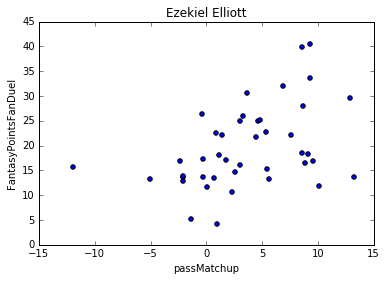

In [146]:
zeke.scatter('passMatchup', 'FantasyPointsFanDuel')

In [150]:
df = RB("Devonta Freeman",rbs)
df.corrMatrix(features)

,RushingAttempts,RushingYards,RushingTouchdowns,ReceivingTargets,Receptions,ReceivingYards,ReceivingTouchdowns,pf,passMatchup,ptsMatchup,offMatchup,offDvoaMatchup,totalDvoaMatchup,FantasyPointsFanDuel
RushingAttempts,1,0.728894,0.477025,0.073851,0.0870608,0.1028,-0.145439,0.0741182,0.122236,0.0138511,0.111472,-0.0837066,-0.0817018,0.574078
RushingYards,0.728894,1,0.452815,-0.0214442,0.0503152,0.185487,-0.0858225,0.149709,0.189316,0.110041,0.179182,0.280454,0.0971148,0.70265
RushingTouchdowns,0.477025,0.452815,1,-0.0362793,-0.0155115,0.231127,-0.152051,0.383087,0.0745732,0.0940117,0.069236,0.136115,0.210216,0.763428
ReceivingTargets,0.073851,-0.0214442,-0.0362793,1,0.944712,0.692069,0.413993,-0.151675,0.0531226,-0.0489807,0.0595604,-0.0206348,0.145146,0.371446
Receptions,0.0870608,0.0503152,-0.0155115,0.944712,1,0.742598,0.437695,-0.0458636,0.166576,0.0502028,0.152117,0.0759701,0.180171,0.438536
ReceivingYards,0.1028,0.185487,0.231127,0.692069,0.742598,1,0.334835,0.209234,0.0755533,0.00201383,0.0654106,0.277287,0.167138,0.640523
ReceivingTouchdowns,-0.145439,-0.0858225,-0.152051,0.413993,0.437695,0.334835,1,0.132002,0.408802,0.151838,0.261164,0.218806,0.0800166,0.252989
pf,0.0741182,0.149709,0.383087,-0.151675,-0.0458636,0.209234,0.132002,1,0.146056,0.132244,0.182859,0.447951,0.353387,0.351334
passMatchup,0.122236,0.189316,0.0745732,0.0531226,0.166576,0.0755533,0.408802,0.146056,1,0.704089,0.877828,0.482568,0.370809,0.256516
ptsMatchup,0.0138511,0.110041,0.0940117,-0.0489807,0.0502028,0.00201383,0.151838,0.132244,0.704089,1,0.759563,0.490644,0.531555,0.141064


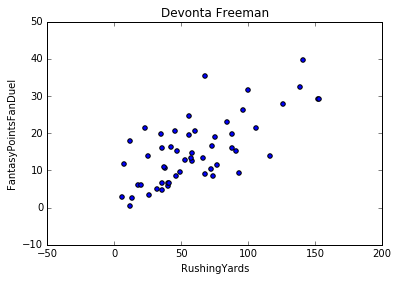

In [153]:
df.scatter('RushingYards', 'FantasyPointsFanDuel')

In [23]:
zeke = rbTableFinal[rbTableFinal['Name'] == 'Ezekiel Elliott']

In [24]:
zeke.columns

Index(['Rank', 'Name', 'Team', 'Position', 'Week', 'Opponent',
       'RushingAttempts', 'RushingYards', 'RushingYardsPerAttempt',
       'RushingTouchdowns', 'ReceivingTargets', 'Receptions', 'ReceivingYards',
       'ReceivingTouchdowns', 'Fumbles', 'FumblesLost',
       'FantasyPointsPerGameFanDuel', 'FantasyPointsFanDuel', 'season',
       'gameId', 'date', 'week', 'team_x', 'homeAway', 'stadium', 'roof',
       'surface', 'avgPf', 'avgOvr_x', 'avgOff', 'avgPass', 'avgPblk',
       'avgRecv', 'avgRun', 'avgRblk', 'totalDvoa_x', 'offDvoa', 'stDvoa',
       'overUnder', 'pa', 'totalScore', 'team_y', 'avgPa', 'avgOvr_y',
       'avgDef', 'avgRdef', 'avgPrsh', 'avgCov', 'totalDvoa_y', 'defDvoa',
       'ptsMatchup', 'offMatchup', 'ovrMatchup', 'passMatchup', 'pblkMatchup',
       'runMatchup', 'offDvoaMatchup', 'totalDvoaMatchup', 'pf'],
      dtype='object')

In [25]:
zeke = zeke[['Name','season','week', 'Opponent','homeAway','surface','ptsMatchup', 'offMatchup', 'ovrMatchup', 'passMatchup', 'pblkMatchup',
       'runMatchup', 'offDvoaMatchup', 'totalDvoaMatchup','totalDvoa_y','defDvoa','overUnder','totalScore','FantasyPointsFanDuel']]

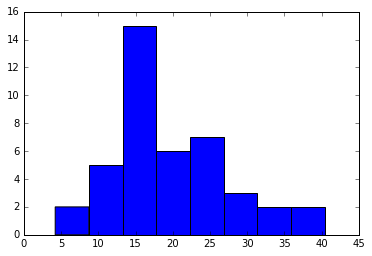

In [26]:
plt.hist(zeke['FantasyPointsFanDuel'].values,bins=8)
plt.show()

In [27]:
zeke['FantasyPointsFanDuel'].describe()

count    42.000000
mean     19.650000
std       8.204825
min       4.200000
25%      13.700000
50%      17.100000
75%      24.975000
max      40.400000
Name: FantasyPointsFanDuel, dtype: float64

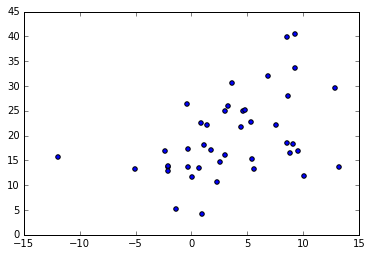

In [38]:
plt.scatter(zeke['passMatchup'],zeke['FantasyPointsFanDuel'])
plt.show()

In [37]:
zeke[['overUnder','FantasyPointsFanDuel']].corr()

,overUnder,FantasyPointsFanDuel
overUnder,1.000000,0.302164
FantasyPointsFanDuel,0.302164,1.000000


In [59]:
X_train, X_test, y_train, y_test = train_test_split(zeke.iloc[:,:-1],zeke.iloc[:,-1:], test_size=0.2,random_state=1020)

In [60]:
ID_col = ['gameId']
target_col = ['pf']
cat_cols = []
num_cols= ['offMatchup', 'ovrMatchup', 'passMatchup', 
           'runMatchup','defDvoa']
other_col= ['Name','Opponent','date','season','week','stadium','surface','team_x','team_y','homeAway','avgPf',
            'avgOvr_x','ptsMatchup', 'avgOff', 'avgPass', 'avgPblk','avgRun', 'avgRblk',
            'totalDvoa_x', 'offDvoa','pa', 'totalScore','avgPa', 'avgOvr_y',
            'avgDef', 'avgRdef', 'avgPrsh', 'avgCov', 'totalDvoa_y', 'totalDvoaMatchup', 'pblkMatchup', 'offDvoaMatchup','avgRecv','overUnder']

In [61]:
# Create label encoders for categorical variables and split the data set
# to train & test, further split the train data set to Train and Validate

#create label encoders for categorical features
for var in cat_cols:
    number = LabelEncoder()
    X_train[var] = number.fit_transform(X_train[var].astype('str'))

for var in cat_cols:
    number = LabelEncoder()
    X_test[var] = number.fit_transform(X_test[var].astype('str'))

In [62]:
features=list(set(list(X_train.columns))-set(ID_col)-set(target_col)-set(other_col))

In [63]:
X_train = X_train[list(features)]
X_test = X_test[list(features)]

In [64]:
X_train

,passMatchup,ovrMatchup,runMatchup,offMatchup,defDvoa
5397,2.557143,3.785714,-15.014286,5.114286,-0.223
6209,8.814286,9.171429,-9.657143,7.500000,-0.054
5969,3.300000,0.257143,0.314286,3.542857,-0.069
6880,9.271429,-1.942857,-7.714286,-2.214286,-0.022
6959,4.800000,-0.100000,0.628571,0.071429,0.028
5135,8.600000,6.571429,-0.514286,11.571429,-0.119
7340,5.628571,-0.028571,-6.500000,-1.357143,0.012
7006,5.314286,2.300000,-9.057143,-0.642857,-0.014
4976,3.628571,-1.300000,-7.414286,7.671429,-0.084
5049,1.371429,2.842857,-15.628571,2.685714,-0.101


In [65]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [66]:
len(X_train)

31

In [67]:
#Add column of ones to account for b_0
X_train = np.append(arr = np.ones((31,1)).astype(int), values = X_train, axis = 1)
X_train[1]

array([ 1.        ,  8.81428571,  9.17142857, -9.65714286,  7.5       ,
       -0.054     ])

In [68]:
X_opt = X_train[:, [0,1]]
regressor_OLS = sm.OLS(endog = y_train, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     FantasyPointsFanDuel   R-squared:                       0.132
Model:                              OLS   Adj. R-squared:                  0.102
Method:                   Least Squares   F-statistic:                     4.413
Date:                  Sat, 20 Jul 2019   Prob (F-statistic):             0.0445
Time:                          20:30:32   Log-Likelihood:                -105.97
No. Observations:                    31   AIC:                             215.9
Df Residuals:                        29   BIC:                             218.8
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.7484      1.738     10.213      0.000      14.194      21.302
x1             0.5590      0.266      2.101      0.044       0.015       1.103
==============================================================================
Omnibus:                        0.431   Durbin-Watson:                   1.836
Prob(Omnibus):                  0.806   Jarque-Bera (JB):                0.569
Skew:                           0.215   Prob(JB):                        0.752
Kurtosis:                       2.495   Cond. No.                         8.35
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
zeke['passMatchup'].describe()

count    39.000000
mean      3.807692
std       5.171406
min     -11.928571
25%       0.778571
50%       3.628571
75%       8.564286
max      13.242857
Name: passMatchup, dtype: float64

In [70]:
zeke[zeke['passMatchup'] > 4][['season','week','Opponent','homeAway','passMatchup','overUnder','totalScore','FantasyPointsFanDuel']]

,season,week,Opponent,homeAway,passMatchup,overUnder,totalScore,FantasyPointsFanDuel
4949,2016,10,PIT,away,8.528571,50.5,65,39.9
5054,2016,9,CLE,away,7.557143,49.0,45,22.2
5135,2016,13,MIN,away,8.600000,43.5,32,18.5
5143,2016,6,GB,away,9.114286,47.0,46,18.4
5903,2017,7,SF,away,9.242857,48.0,50,40.4
6880,2018,10,PHI,away,9.271429,45.5,47,33.7
6903,2018,11,ATL,away,12.857143,50.0,41,29.6
7404,2018,5,HOU,away,10.057143,45.5,35,11.9
5050,2016,12,WAS,home,4.614286,53.0,57,25.0
5137,2016,16,DET,home,4.457143,46.5,63,21.7


In [71]:
X_test.shape

(8, 5)

In [72]:
# Now use this model to make predictions on the test set
X_test = np.append(arr = np.ones((8,1)).astype(int), values = X_test, axis = 1)
X_test = X_test[:, [0,4]]
regressor = LinearRegression()
regressor.fit(X_opt, y_train)
y_pred = regressor.predict(X_test)

In [73]:
print(y_test)
print(y_pred)

      FantasyPointsFanDuel
7189                  16.1
7306                  13.3
4949                  39.9
7112                  18.2
5321                  16.8
7013                  22.6
7658                   5.2
5054                  22.2
[[ 18.02788624]
 [ 18.42717428]
 [ 25.36680051]
 [ 16.85397938]
 [ 23.10683018]
 [ 14.58602329]
 [ 17.17340982]
 [ 24.9195979 ]]


In [74]:
X_test

array([[  1.        ,   0.5       ],
       [  1.        ,   1.21428571],
       [  1.        ,  13.62857143],
       [  1.        ,  -1.6       ],
       [  1.        ,   9.58571429],
       [  1.        ,  -5.65714286],
       [  1.        ,  -1.02857143],
       [  1.        ,  12.82857143]])

In [75]:
features.append('FantasyPointsFanDuel')

In [76]:
corr = zeke[features].corr()
corr.style.background_gradient(cmap='coolwarm')

,passMatchup,ovrMatchup,runMatchup,offMatchup,defDvoa,FantasyPointsFanDuel
passMatchup,1,0.156633,0.00241164,0.519501,0.167001,0.415167
ovrMatchup,0.156633,1,0.267432,0.434931,0.123264,-0.129256
runMatchup,0.00241164,0.267432,1,0.452111,0.555312,0.0301639
offMatchup,0.519501,0.434931,0.452111,1,0.340751,0.141794
defDvoa,0.167001,0.123264,0.555312,0.340751,1,0.136285
FantasyPointsFanDuel,0.415167,-0.129256,0.0301639,0.141794,0.136285,1


In [77]:
bark = rbTableFinal[rbTableFinal['Name'] == 'Saquon Barkley']
bark

,Rank,Name,Team,Position,Week,Opponent,RushingAttempts,RushingYards,RushingYardsPerAttempt,RushingTouchdowns,...,defDvoa,ptsMatchup,offMatchup,ovrMatchup,passMatchup,pblkMatchup,runMatchup,offDvoaMatchup,totalDvoaMatchup,pf
6900,29,Saquon Barkley,New York Giants,RB,12,PHI,13,101,7.8,1,...,0.042,48.000000,0.128571,-5.028571,5.571429,-11.785714,-2.385714,-0.069,0.042,22
6919,38,Saquon Barkley,New York Giants,RB,14,WAS,14,170,12.1,1,...,0.017,45.142857,-3.057143,1.757143,-0.728571,-5.600000,-3.557143,-0.017,0.093,40
6930,45,Saquon Barkley,New York Giants,RB,5,CAR,15,48,3.2,0,...,0.068,39.428571,2.685714,-1.342857,6.557143,3.557143,-7.542857,-0.114,-0.315,31
7039,107,Saquon Barkley,New York Giants,RB,7,ATL,14,43,3.1,1,...,0.225,48.857143,6.985714,0.785714,2.171429,3.642857,3.828571,-0.237,0.027,20
7070,125,Saquon Barkley,New York Giants,RB,3,HOU,17,82,4.8,1,...,-0.104,42.857143,0.242857,1.614286,4.414286,3.900000,-9.457143,-0.090,-0.463,27
7137,167,Saquon Barkley,New York Giants,RB,2,DAL,11,28,2.5,0,...,0.073,29.285714,-9.742857,-6.071429,-4.342857,-9.171429,-12.142857,-0.146,0.115,13
7182,208,Saquon Barkley,New York Giants,RB,16,IND,21,43,2.0,1,...,-0.045,40.714286,-0.985714,-6.671429,-2.657143,5.600000,-7.128571,0.028,-0.108,27
7383,347,Saquon Barkley,New York Giants,RB,10,SF,20,67,3.4,0,...,0.005,46.142857,6.857143,0.185714,6.842857,-1.671429,-1.114286,-0.064,0.056,27
6892,10,Saquon Barkley,New York Giants,RB,11,TB,27,142,5.3,2,...,0.189,54.142857,11.271429,4.042857,6.314286,5.771429,2.200000,-0.257,0.102,38
6895,14,Saquon Barkley,New York Giants,RB,6,PHI,13,130,10.0,1,...,-0.029,38.000000,-5.885714,-8.100000,-0.100000,-9.385714,-7.371429,0.034,0.008,13


In [78]:
corr = bark[features].corr()
corr.style.background_gradient(cmap='coolwarm')

,passMatchup,ovrMatchup,runMatchup,offMatchup,defDvoa,FantasyPointsFanDuel
passMatchup,1,0.379657,0.158804,0.787124,0.562516,0.284164
ovrMatchup,0.379657,1,0.699272,0.681684,0.169375,0.0929633
runMatchup,0.158804,0.699272,1,0.619497,0.256607,0.206027
offMatchup,0.787124,0.681684,0.619497,1,0.561765,0.193297
defDvoa,0.562516,0.169375,0.256607,0.561765,1,0.288163
FantasyPointsFanDuel,0.284164,0.0929633,0.206027,0.193297,0.288163,1


In [79]:
tg = rbTableFinal[rbTableFinal['Name'] == 'Todd Gurley']
corr = tg[features].corr()
corr.style.background_gradient(cmap='coolwarm')

,passMatchup,ovrMatchup,runMatchup,offMatchup,defDvoa,FantasyPointsFanDuel
passMatchup,1,0.646481,0.157272,0.914502,0.331231,0.2295
ovrMatchup,0.646481,1,0.206228,0.739233,0.208432,0.539166
runMatchup,0.157272,0.206228,1,0.38703,0.20181,0.249984
offMatchup,0.914502,0.739233,0.38703,1,0.353347,0.279387
defDvoa,0.331231,0.208432,0.20181,0.353347,1,0.249421
FantasyPointsFanDuel,0.2295,0.539166,0.249984,0.279387,0.249421,1


In [80]:
tg[(tg['ovrMatchup']>0) & (tg['season']>2016)][['Week','season','Opponent', 'ovrMatchup','FantasyPointsFanDuel']].sort_values('season')

,Week,season,Opponent,ovrMatchup,FantasyPointsFanDuel
5896,16,2017,TEN,3.300000,44.6
5898,15,2017,SEA,3.714286,43.5
5907,3,2017,SF,4.142857,35.4
6010,9,2017,NYG,7.814286,23.4
6075,13,2017,ARI,8.585714,18.8
6207,10,2017,HOU,2.385714,16.6
6009,7,2017,ARI,2.400000,23.4
6982,10,2018,SEA,12.057143,23.5
6979,4,2018,MIN,6.057143,23.6
6926,15,2018,PHI,4.657143,29.4


In [82]:
cmc = rbTableFinal[rbTableFinal['Name'] == 'Christian McCaffrey']
cmc = cmc[cmc['season'] > 2017]
corr = cmc[features].corr()
corr.style.background_gradient(cmap='coolwarm')

,passMatchup,ovrMatchup,runMatchup,offMatchup,defDvoa,FantasyPointsFanDuel
passMatchup,1,0.83572,0.502335,0.892157,0.462086,0.625264
ovrMatchup,0.83572,1,0.64128,0.839239,0.292942,0.443164
runMatchup,0.502335,0.64128,1,0.789844,0.371609,0.382533
offMatchup,0.892157,0.839239,0.789844,1,0.491805,0.668084
defDvoa,0.462086,0.292942,0.371609,0.491805,1,0.0899275
FantasyPointsFanDuel,0.625264,0.443164,0.382533,0.668084,0.0899275,1


In [113]:
cmc['offMatchup'].describe()

count    15.000000
mean      0.352381
std       7.940760
min     -14.885714
25%      -5.035714
50%      -0.985714
75%       6.314286
max      14.942857
Name: offMatchup, dtype: float64

In [129]:
cmc[cmc['offMatchup'] > -3][['Week','season','Opponent', 'offMatchup','FantasyPointsFanDuel']]

,Week,season,Opponent,offMatchup,FantasyPointsFanDuel
6869,10,2018,PIT,6.600000,34.3
6937,13,2018,TB,14.942857,26.6
6966,14,2018,CLE,7.928571,25.1
7291,11,2018,DET,6.028571,14.0
6874,12,2018,SEA,5.971429,41.2
6920,9,2018,TB,9.042857,30.2
6971,16,2018,ATL,-2.214286,23.8
7051,3,2018,CIN,-1.771429,20.4
7069,8,2018,BAL,-0.985714,19.6
7133,5,2018,NYG,-0.085714,17.8


In [83]:
cmc[cmc['offMatchup'] > -3]['FantasyPointsFanDuel'].mean()

25.300000000000004

In [84]:
pit1 = rbTableFinal[(rbTableFinal['Team'] == 'Pittsburgh Steelers') & ((rbTableFinal['RushingAttempts'] + rbTableFinal['ReceivingTargets']) > 19)]

In [85]:
corr = pit1[features].corr()
corr.style.background_gradient(cmap='coolwarm')

,passMatchup,ovrMatchup,runMatchup,offMatchup,defDvoa,FantasyPointsFanDuel
passMatchup,1,0.712033,-0.0769417,0.766631,0.38571,-0.068632
ovrMatchup,0.712033,1,0.0143494,0.681059,0.338783,-0.0172574
runMatchup,-0.0769417,0.0143494,1,0.415246,0.275472,0.0505694
offMatchup,0.766631,0.681059,0.415246,1,0.485178,0.0783754
defDvoa,0.38571,0.338783,0.275472,0.485178,1,-0.0319498
FantasyPointsFanDuel,-0.068632,-0.0172574,0.0505694,0.0783754,-0.0319498,1


In [86]:
pit1[['Name','season','Week','FantasyPointsFanDuel']]

,Name,season,Week,FantasyPointsFanDuel
351,Isaac Redman,2011,17,14.5
802,Rashard Mendenhall,2011,3,6.1
1053,Isaac Redman,2012,9,22.1
1417,Jonathan Dwyer,2012,13,13.2
2075,Le'Veon Bell,2013,13,23.1
2079,Le'Veon Bell,2013,4,22.4
2228,Le'Veon Bell,2013,16,17.4
2301,Le'Veon Bell,2013,9,15.9
2418,Le'Veon Bell,2013,8,13.6
2579,Le'Veon Bell,2013,12,10.8


In [88]:
pit1['FantasyPointsFanDuel'].describe()

count    79.000000
mean     20.808861
std       8.603550
min       6.100000
25%      14.200000
50%      19.900000
75%      26.500000
max      49.800000
Name: FantasyPointsFanDuel, dtype: float64

In [89]:
kc1 = rbTableFinal[(rbTableFinal['Team'] == 'Kansas City Chiefs') & ((rbTableFinal['RushingAttempts'] + rbTableFinal['ReceivingTargets']) > 15)]

In [90]:
corr = kc1[features].corr()
corr.style.background_gradient(cmap='coolwarm')

,passMatchup,ovrMatchup,runMatchup,offMatchup,defDvoa,FantasyPointsFanDuel
passMatchup,1,0.586925,0.130125,0.760643,0.232852,0.10107
ovrMatchup,0.586925,1,0.297673,0.650253,0.177692,0.0331231
runMatchup,0.130125,0.297673,1,0.579946,0.250094,0.18998
offMatchup,0.760643,0.650253,0.579946,1,0.429688,0.205971
defDvoa,0.232852,0.177692,0.250094,0.429688,1,0.0305512
FantasyPointsFanDuel,0.10107,0.0331231,0.18998,0.205971,0.0305512,1


In [91]:
kc1[['Name','season','Week','FantasyPointsFanDuel']]

,Name,season,Week,FantasyPointsFanDuel
182,Thomas Jones,2011,13,3.6
285,Dexter McCluster,2011,17,16.1
286,Thomas Jones,2011,17,4.2
328,Jackie Battle,2011,5,15.0
749,Jackie Battle,2011,7,7.6
940,Jamaal Charles,2012,3,37.8
1034,Jamaal Charles,2012,14,22.5
1249,Jamaal Charles,2012,10,16.0
1619,Jamaal Charles,2012,9,8.1
1801,Jamaal Charles,2012,17,7.2


In [92]:
kc1['FantasyPointsFanDuel'].mean()

17.760000000000002

In [7]:
%store -r awayTable
%store -r homeTable

In [63]:
ravensAway = awayTable[(awayTable['season'] == 2018) & (awayTable['team'] == 'Baltimore Ravens')].sort_values('week')
ravensHome = homeTable[(homeTable['season'] == 2018) & (homeTable['team'] == 'Baltimore Ravens')].sort_values('week')
ravens = pd.concat([ravensAway,ravensHome])

In [98]:
ravens = ravens.sort_values('week')
ravens.loc[[402]]['avgPass']

402    59.642857
Name: avgPass, dtype: float64

In [100]:
dolphinsAway = awayTable[(awayTable['season'] == 2018) & (awayTable['team'] == 'Miami Dolphins')].sort_values('week')
dolphinsHome = homeTable[(homeTable['season'] == 2018) & (homeTable['team'] == 'Miami Dolphins')].sort_values('week')
dolphins = pd.concat([dolphinsAway,dolphinsHome])
dolphins = dolphins.sort_values('week')
dolphins #.loc[[455]]['avgPblk']

,gameId,date,season,week,team,homeAway,stadium,roof,surface,avgPf,...,totalScore,overUnder,result,totalDvoa,offDvoa,offRank,defDvoa,defRank,stDvoa,stRank
750,201809090mia,2018-09-09,2018,1,Miami Dolphins,home,Hard Rock Stadium,outdoors,grass,20.571429,...,47,43.5,over,-0.072,-0.047,22,0.022,23,-0.003,13
451,201809160nyj,2018-09-16,2018,2,Miami Dolphins,away,MetLife Stadium,outdoors,turf,21.571429,...,32,43.0,under,0.242,0.067,13,-0.305,5,-0.130,28
589,201809230mia,2018-09-23,2018,3,Miami Dolphins,home,Hard Rock Stadium,outdoors,grass,22.000000,...,48,46.0,over,0.422,0.006,18,-0.408,1,0.008,11
442,201809300nwe,2018-09-30,2018,4,Miami Dolphins,away,Gillette Stadium,outdoors,turf,21.000000,...,45,50.5,under,0.430,0.172,8,-0.222,3,0.036,7
457,201810070cin,2018-10-07,2018,5,Miami Dolphins,away,Paul Brown Stadium,outdoors,turf,18.142857,...,44,47.5,under,0.159,0.020,16,-0.116,7,0.023,10
126,201810140mia,2018-10-14,2018,6,Miami Dolphins,home,Hard Rock Stadium,outdoors,grass,18.285714,...,59,40.5,over,0.162,-0.029,18,-0.124,5,0.066,5
246,201810210mia,2018-10-21,2018,7,Miami Dolphins,home,Hard Rock Stadium,outdoors,grass,20.857143,...,53,47.0,over,0.167,0.025,15,-0.074,9,0.068,3
456,201810250htx,2018-10-25,2018,8,Miami Dolphins,away,NRG Stadium,dome,turf,21.571429,...,65,45.0,over,0.111,0.044,14,-0.015,15,0.052,3
567,201811040mia,2018-11-04,2018,9,Miami Dolphins,home,Hard Rock Stadium,outdoors,grass,21.000000,...,19,43.0,under,0.064,0.041,13,0.035,23,0.058,3
444,201811110gnb,2018-11-11,2018,10,Miami Dolphins,away,Lambeau Field,outdoors,grass,20.000000,...,43,48.5,under,0.047,-0.003,17,0.006,19,0.056,3
